In [2]:
import pandas as pd

In [3]:
df = pd.read_excel("miuul_gezinomi.xlsx")
df

,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons
0,415122,2022-12-03,2022-12-03,79.304029,Herşey Dahil,Antalya,Saturday,0,Low
1,415103,2022-12-03,2022-12-03,45.970696,Yarım Pansiyon,Antalya,Saturday,0,Low
2,404034,2022-09-12,2022-09-13,77.838828,Herşey Dahil,Antalya,Tuesday,1,High
3,415094,2022-12-03,2022-12-10,222.710623,Yarım Pansiyon,İzmir,Saturday,7,Low
4,414951,2022-12-01,2022-12-03,140.476190,Yarım Pansiyon,İzmir,Saturday,2,Low
...,...,...,...,...,...,...,...,...,...
59159,51817,2016-01-05,2016-10-10,54.304636,Herşey Dahil,Antalya,Monday,279,Low
59160,51816,2016-01-05,2016-10-10,54.304636,Herşey Dahil,Antalya,Monday,279,Low
59161,51814,2016-01-05,2016-01-06,40.562914,Herşey Dahil,Diğer,Wednesday,1,Low
59162,51736,2016-01-04,2016-01-05,69.847682,Yarım Pansiyon,Diğer,Tuesday,1,Low


In [13]:
df.head()

,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons
0,415122,2022-12-03,2022-12-03,79.304029,Herşey Dahil,Antalya,Saturday,0,Low
1,415103,2022-12-03,2022-12-03,45.970696,Yarım Pansiyon,Antalya,Saturday,0,Low
2,404034,2022-09-12,2022-09-13,77.838828,Herşey Dahil,Antalya,Tuesday,1,High
3,415094,2022-12-03,2022-12-10,222.710623,Yarım Pansiyon,İzmir,Saturday,7,Low
4,414951,2022-12-01,2022-12-03,140.476190,Yarım Pansiyon,İzmir,Saturday,2,Low


***İŞ PROBLEMİ**
 ***Gezinomi yaptığı satışların bazı özelliklerini kullanarak seviye tabanlı
 (level based) yeni satış tanımları oluşturmak ve bu yeni satış
 tanımlarına göre segmentler oluşturup busegmentlere göre yeni 
gelebilecek müşterilerin şirkete ortalama ne kadar kazandırabileceğini
 tahminetmekistemektedir.***


 ***
 ***SaleId: Satış id
 
 SaleDate:Satış Tarihi
 
 CheckInDate:Müşterininotelegirişitarihi
 
 Price:Satış için ödenen fiyat
 
 ConceptName:Otelkonseptbilgisi
 
 SaleCityName: Otelin bulunduğu şehir bilgisi
 
 CInDay:Müşterinin otele giriş günü
 
 SaleCheckInDayDiff: Check in ile giriş tarihi gün farkı
 
 Season:Otele giriş tarihindeki sezon bilgisİ***
***

In [14]:
df.tail()

,SaleId,SaleDate,CheckInDate,Price,ConceptName,SaleCityName,CInDay,SaleCheckInDayDiff,Seasons
59159,51817,2016-01-05,2016-10-10,54.304636,Herşey Dahil,Antalya,Monday,279,Low
59160,51816,2016-01-05,2016-10-10,54.304636,Herşey Dahil,Antalya,Monday,279,Low
59161,51814,2016-01-05,2016-01-06,40.562914,Herşey Dahil,Diğer,Wednesday,1,Low
59162,51736,2016-01-04,2016-01-05,69.847682,Yarım Pansiyon,Diğer,Tuesday,1,Low
59163,51731,2016-01-04,2016-08-22,158.940397,Herşey Dahil,Antalya,Monday,231,High


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59164 entries, 0 to 59163
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SaleId              59164 non-null  int64         
 1   SaleDate            59164 non-null  datetime64[ns]
 2   CheckInDate         59164 non-null  datetime64[ns]
 3   Price               59151 non-null  float64       
 4   ConceptName         59164 non-null  object        
 5   SaleCityName        59164 non-null  object        
 6   CInDay              59164 non-null  object        
 7   SaleCheckInDayDiff  59164 non-null  int64         
 8   Seasons             59164 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 4.1+ MB


In [18]:
#kaçunique şehirvardır? Frekanslarınedir?
df["SaleCityName"].nunique()
df["SaleCityName"].value_counts()

SaleCityName
Antalya    31649
Muğla      10662
Aydın      10646
Diğer       3245
İzmir       2507
Girne        455
Name: count, dtype: int64

In [20]:
#kaç unique Concept vardır?
df["ConceptName"].unique()



array(['Herşey Dahil', 'Yarım Pansiyon', 'Oda + Kahvaltı'], dtype=object)

In [21]:
#HangiConcept’denkaçartanesatış gerçekleşmiş?
df["ConceptName"].value_counts()

ConceptName
Herşey Dahil      53186
Yarım Pansiyon     3559
Oda + Kahvaltı     2419
Name: count, dtype: int64

In [24]:
#Şehirlere göre satışlardan toplam ne kadar kazanılmış?
df.groupby("SaleCityName").agg({"Price": "sum"})


,Price
SaleCityName,
Antalya,2.041911e+06
Aydın,5.732960e+05
Diğer,1.545723e+05
Girne,2.706503e+04
Muğla,6.658422e+05
İzmir,1.659348e+05


In [25]:
#Concept türlerine göre göre ne kadar kazanılmış?
df.groupby("ConceptName").agg({"Price": "sum"})

,Price
ConceptName,
Herşey Dahil,3.332911e+06
Oda + Kahvaltı,1.213084e+05
Yarım Pansiyon,1.744024e+05


In [26]:
#Şehirlere göre PRICE ortalamaları nedir?
df.groupby("SaleCityName").agg({"Price": "mean"})

,Price
SaleCityName,
Antalya,64.521474
Aydın,53.855896
Diğer,47.707497
Girne,59.483579
Muğla,62.461746
İzmir,66.267905


In [27]:
#Conceptlere göre PRICE ortalamaları nedir?
df.groupby("ConceptName").agg({"Price": "mean"})

,Price
ConceptName,
Herşey Dahil,62.672260
Oda + Kahvaltı,50.252010
Yarım Pansiyon,49.030742


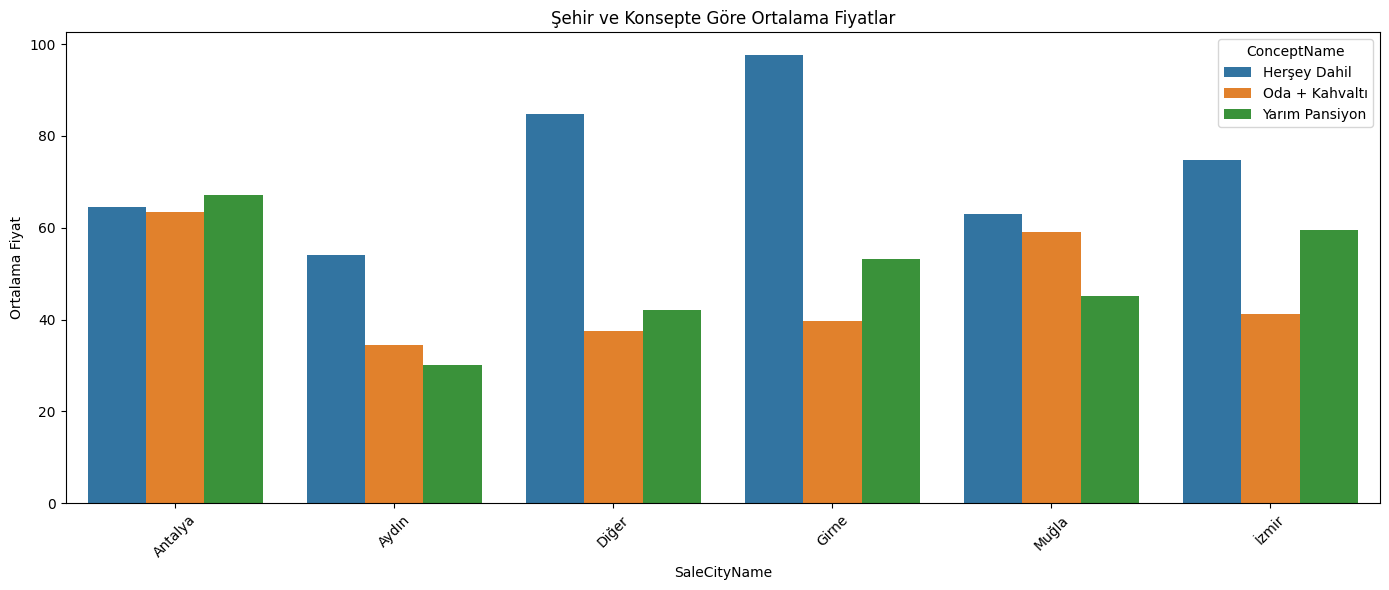

In [33]:
#Şehir-Concept kırılımındaPRICE ortalamalarınedir?
import seaborn as sns
import matplotlib.pyplot as plt
grouped_df = df.groupby(["SaleCityName", "ConceptName"]).agg({"Price": "mean"}).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=grouped_df, x="SaleCityName", y="Price", hue="ConceptName")
plt.title("Şehir ve Konsepte Göre Ortalama Fiyatlar")
plt.ylabel("Ortalama Fiyat")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
# SaleCheckInDayDiffdeğişkenini kategorik bir değişkene çevirelim.
bins = [-1, 7, 30, 90, df["SaleCheckInDayDiff"].max()]
labels = ["Last Minuters", "Potential Planners", "Planners", "Early Bookers"]
df["EB_Score"] = pd.cut(df["SaleCheckInDayDiff"], bins, labels=labels)
df.head(50).to_excel("eb_scorew.xlsx", index=False)

In [48]:
# Şehir-Concept-EB Score, Şehir-Concept-Sezon,Şehir-Concept-CInDaykırılımında ortalama ödenen ücret ve yapılan işlem sayısı cinsinden
 #inceleyiniz ?
# Şehir-Concept-EB Score kırılımında ücret ortalamaları
df.groupby(by=["SaleCityName", 'ConceptName', "EB_Score" ]).agg({"Price": ["mean", "count"]})



C:\Users\petek\AppData\Local\Temp\ipykernel_19072\3419119493.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by=["SaleCityName", 'ConceptName', "EB_Score" ]).agg({"Price": ["mean", "count"]})


Price       
                                                     mean  count
SaleCityName ConceptName    EB_Score                            
Antalya      Herşey Dahil   Last Minuters       62.752916  14148
                            Potential Planners  64.903700   8874
                            Planners            67.879960   4490
                            Early Bookers       66.494885   3281
             Oda + Kahvaltı Last Minuters       65.353740    503
...                                                   ...    ...
İzmir        Oda + Kahvaltı Early Bookers       66.928111      3
             Yarım Pansiyon Last Minuters       57.788126    636
                            Potential Planners  64.804043    198
                            Planners            60.507887     47
                            Early Bookers       65.905583     14

[72 rows x 2 columns]

In [44]:

# Şehir-Concept-Sezon kırılımında ücret ortalamaları
df.groupby(by=["SaleCityName", "ConceptName", "Seasons"]).agg({"Price": ["mean", "count"]})


Price       
                                           mean  count
SaleCityName ConceptName    Seasons                   
Antalya      Herşey Dahil   High      64.920065  27126
                            Low       61.552427   3667
             Oda + Kahvaltı High      66.267969    303
                            Low       60.666730    295
             Yarım Pansiyon High      73.259029    118
                            Low       62.001678    138
Aydın        Herşey Dahil   High      54.946560  10103
                            Low       33.680699    473
             Oda + Kahvaltı High      30.387530     27
                            Low       44.451874     11
             Yarım Pansiyon High      32.626152     20
                            Low       25.271799     11
Diğer        Herşey Dahil   High      83.787273    364
                            Low       87.310882    141
             Oda + Kahvaltı High      34.839543    349
                            Low       39.959569    408
             Yarım Pansiyon High      39.731916    516
                            Low       42.953978   1462
Girne        Herşey Dahil   High     103.935448     55
                            Low       90.935944     51
             Oda + Kahvaltı High      39.479630     66
                            Low       40.043067     73
             Yarım Pansiyon High      58.383668    100
                            Low       48.578903    110
Muğla        Herşey Dahil   High      63.384036   9582
                            Low       48.304086    237
             Oda + Kahvaltı High      61.264691    592
                            Low       37.774192     62
             Yarım Pansiyon High      45.823698    177
                            Low       32.681812     10
İzmir        Herşey Dahil   High      74.748363   1234
                            Low       74.308287    147
             Oda + Kahvaltı High      54.141797     86
                            Low       33.555235    142
             Yarım Pansiyon High      87.657303    118
                            Low       55.350626    777

In [45]:

# Şehir-Concept-CInday kırılımında ücret ortalamaları
df.groupby(by=["SaleCityName", "ConceptName", "CInDay"]).agg({"Price": ["mean", "count"]})

Price      
                                            mean count
SaleCityName ConceptName    CInDay                    
Antalya      Herşey Dahil   Friday     62.658940  4136
                            Monday     63.259143  6831
                            Saturday   64.415526  4741
                            Sunday     65.849177  3818
                            Thursday   62.892734  3898
...                                          ...   ...
İzmir        Yarım Pansiyon Saturday   52.504725   315
                            Sunday     98.934697    68
                            Thursday   52.484894    91
                            Tuesday    56.141381    73
                            Wednesday  54.064392    86

[126 rows x 2 columns]

In [49]:
# GÖREV 4: City-Concept-Season kırılımın çıktısını PRICE'a göre sıralayınız.

# Önceki sorudaki çıktıyı daha iyi görebilmek için sort_values metodunu azalan olacak şekilde PRICE'a uygulayınız.
# Çıktıyı agg_df olarak kaydediniz.

agg_df = df.groupby(["SaleCityName", "ConceptName", "Seasons"]).agg({"Price": "mean"}).sort_values("Price", ascending=False)
agg_df.head(20)

Price
SaleCityName ConceptName    Seasons            
Girne        Herşey Dahil   High     103.935448
                            Low       90.935944
İzmir        Yarım Pansiyon High      87.657303
Diğer        Herşey Dahil   Low       87.310882
                            High      83.787273
İzmir        Herşey Dahil   High      74.748363
                            Low       74.308287
Antalya      Yarım Pansiyon High      73.259029
             Oda + Kahvaltı High      66.267969
             Herşey Dahil   High      64.920065
Muğla        Herşey Dahil   High      63.384036
Antalya      Yarım Pansiyon Low       62.001678
             Herşey Dahil   Low       61.552427
Muğla        Oda + Kahvaltı High      61.264691
Antalya      Oda + Kahvaltı Low       60.666730
Girne        Yarım Pansiyon High      58.383668
İzmir        Yarım Pansiyon Low       55.350626
Aydın        Herşey Dahil   High      54.946560
İzmir        Oda + Kahvaltı High      54.141797
Girne        Yarım Pansiyon Low       48.578903

In [50]:
# GÖREV 5: Indekste yer alan isimleri değişken ismine çeviriniz.
# Üçüncü sorunun çıktısında yer alan PRICE dışındaki tüm değişkenler index isimleridir.
# Bu isimleri değişken isimlerine çeviriniz.

agg_df.reset_index(inplace=True)

In [51]:
# sales_level_based adında bir değişken tanımlayınız ve veri setine bu değişkeni ekleyiniz.
agg_df['sales_level_based'] = agg_df[["SaleCityName", "ConceptName", "Seasons"]].agg(lambda x: '_'.join(x).upper(), axis=1)

In [52]:
agg_df["SEGMENT"] = pd.qcut(agg_df["Price"], 4, labels=["D", "C", "B", "A"])
agg_df.head(30)
agg_df.groupby("SEGMENT").agg({"Price": ["mean", "max", "sum"]})


C:\Users\petek\AppData\Local\Temp\ipykernel_19072\36849549.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df.groupby("SEGMENT").agg({"Price": ["mean", "max", "sum"]})


Price                        
              mean         max         sum
SEGMENT                                   
D        33.366288   39.479630  300.296592
C        44.887654   54.141797  403.988887
B        60.274498   64.920065  542.470478
A        82.467833  103.935448  742.210498

In [53]:
agg_df.sort_values(by="Price")


,SaleCityName,ConceptName,Seasons,Price,sales_level_based,SEGMENT
35,Aydın,Yarım Pansiyon,Low,25.271799,AYDIN_YARIM PANSIYON_LOW,D
34,Aydın,Oda + Kahvaltı,High,30.387530,AYDIN_ODA + KAHVALTI_HIGH,D
33,Aydın,Yarım Pansiyon,High,32.626152,AYDIN_YARIM PANSIYON_HIGH,D
32,Muğla,Yarım Pansiyon,Low,32.681812,MUĞLA_YARIM PANSIYON_LOW,D
31,İzmir,Oda + Kahvaltı,Low,33.555235,İZMIR_ODA + KAHVALTI_LOW,D
30,Aydın,Herşey Dahil,Low,33.680699,AYDIN_HERŞEY DAHIL_LOW,D
29,Diğer,Oda + Kahvaltı,High,34.839543,DIĞER_ODA + KAHVALTI_HIGH,D
28,Muğla,Oda + Kahvaltı,Low,37.774192,MUĞLA_ODA + KAHVALTI_LOW,D
27,Girne,Oda + Kahvaltı,High,39.479630,GIRNE_ODA + KAHVALTI_HIGH,D
26,Diğer,Yarım Pansiyon,High,39.731916,DIĞER_YARIM PANSIYON_HIGH,C


In [54]:
new_user = "ANTALYA_HERŞEY DAHIL_HIGH"
agg_df[agg_df["sales_level_based"] == new_user]

,SaleCityName,ConceptName,Seasons,Price,sales_level_based,SEGMENT
9,Antalya,Herşey Dahil,High,64.920065,ANTALYA_HERŞEY DAHIL_HIGH,B


C:\Users\petek\AppData\Local\Temp\ipykernel_19072\763603681.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg_df, x="SEGMENT", y="Price", order=["A", "B", "C", "D"], palette="coolwarm")


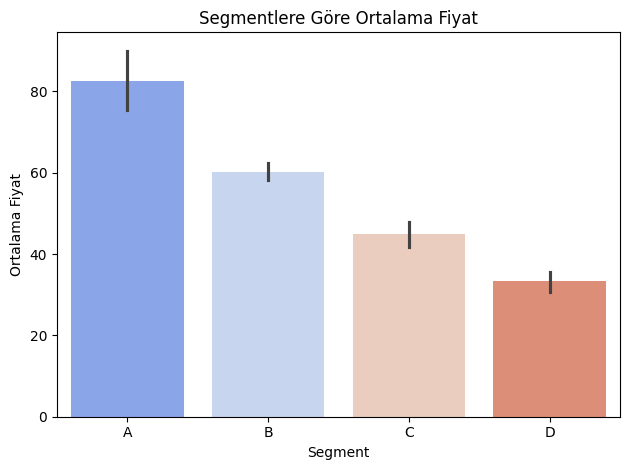

In [59]:
sns.barplot(data=agg_df, x="SEGMENT", y="Price", order=["A", "B", "C", "D"], palette="coolwarm")
plt.title("Segmentlere Göre Ortalama Fiyat")
plt.xlabel("Segment")
plt.ylabel("Ortalama Fiyat")
plt.tight_layout()
plt.show()